In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skewnorm
import plotly.express as px 

In [2]:
base = pd.read_csv('vgsales.csv')
base.shape

(16598, 11)

In [3]:
base.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
base.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
base.dropna(subset=['Year'], inplace= True)

In [6]:
base.dropna(subset=['Publisher'], inplace= True)

In [7]:
base.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
base.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Vamos ver se os dados tem uma distribuição normal

In [21]:
base = norm.rvs(size = 16598)
base

array([ 1.49151286,  0.69684373, -0.17463921, ...,  2.21180387,
        0.5735564 ,  1.07745333])

Text(0.5, 1.0, 'Dados')

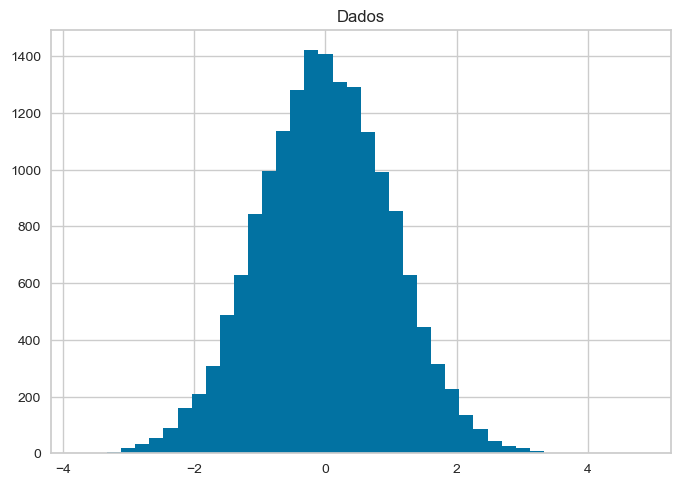

In [22]:
plt.hist(base, bins=40)
plt.title('Dados')

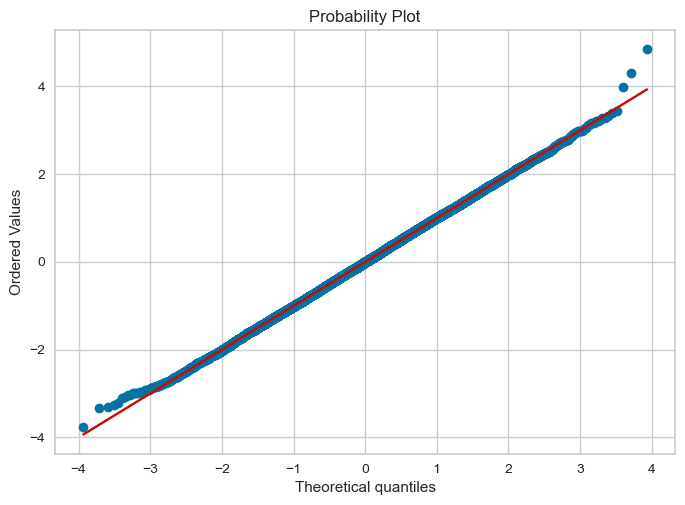

In [23]:
fig, ax = plt.subplots()
stats.probplot(base, fit = True, plot=ax)
plt.show()

In [24]:
stats.shapiro(base)

c:\Users\joaol\anaconda3\envs\Neural_Networks_Deep_Learning\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9997982382774353, pvalue=0.11897655576467514)

In [9]:
base['Year'] = base['Year'].astype(int)
base

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Vamos ver a quantidade de lançamentos por ano 
display(base['Year'].value_counts(normalize=True).map('{:.1%}'.format))

2009    8.8%
2008    8.8%
2010    7.7%
2007    7.4%
2011    7.0%
2006    6.2%
2005    5.7%
2002    5.1%
2003    4.8%
2004    4.6%
2012    4.0%
2015    3.8%
2014    3.6%
2013    3.4%
2001    3.0%
1998    2.3%
2000    2.1%
2016    2.1%
1999    2.1%
1997    1.8%
1996    1.6%
1995    1.3%
1994    0.7%
1993    0.4%
1981    0.3%
1992    0.3%
1991    0.3%
1982    0.2%
1986    0.1%
1989    0.1%
1983    0.1%
1990    0.1%
1987    0.1%
1988    0.1%
1985    0.1%
1984    0.1%
1980    0.1%
2017    0.0%
2020    0.0%
Name: Year, dtype: object

Podemos perceber que  o dataset apresenta lançamentos de 1980 até 2020, e no ano de 2009 foi o ano que mais vendeu 

Como os anos de 2020 e 2017 apresentam dados faltantes e os anos de 2018 e 2019 não aparecem na lista, iremos concluir que todos os lançamentos pós-2016 apresentam dados faltantes. Iremos, portanto, remover estes lançamentos de nosso dataset. Agora vamos eliminar todos os dados que seja maior ou igual a 2017


In [ ]:
base_anos_drop = base[base['Year'] >= 2017].index
base = base.drop(base_anos_drop)
base['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983])

In [ ]:
base.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
base.groupby('Name', as_index= False)['Platform'].count().sort_values('Platform', ascending= False).head(10)

,Name,Platform
6580,Need for Speed: Most Wanted,12
5031,LEGO Marvel Super Heroes,9
7633,Ratatouille,9
2872,FIFA 14,9
9787,The LEGO Movie Videogame,8
2873,FIFA 15,8
9566,Terraria,8
5096,Lego Batman 3: Beyond Gotham,8
5044,LEGO The Hobbit,8
5040,LEGO Star Wars II: The Original Trilogy,8


O jogo need for speed foi o jogo que teve mais  lançamento com 12 plataformas lançadas 

Vamos observar as vendas deste jogo em cada console

In [ ]:
base.query("Name == 'Need for Speed: Most Wanted'").sort_values('Global_Sales', ascending= True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11676,11678,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08
6492,6494,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.19,0.07,0.00,0.00,0.26
6278,6280,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27
6149,6151,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
5900,5902,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
3585,3587,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
2005,2007,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
1742,1744,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
1530,1532,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1173,1175,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58


Agora vamos fazer um somatorios nas vendas 

In [ ]:
base.groupby('Name', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending = False).head(10)

,Name,Global_Sales
10846,Wii Sports,82.74
3649,Grand Theft Auto V,55.92
9198,Super Mario Bros.,45.31
9578,Tetris,35.84
5491,Mario Kart Wii,35.82
10848,Wii Sports Resort,33.00
7244,Pokemon Red/Pokemon Blue,31.37
1209,Call of Duty: Modern Warfare 3,30.83
6630,New Super Mario Bros.,30.01
1205,Call of Duty: Black Ops II,29.72


Vamos fazer o ranking dos top 10 jogos mais vendidos 

In [ ]:
top_10 = pd.DataFrame(base.groupby('Name')[['Name', 'Global_Sales']].sum().sort_values('Global_Sales', ascending= False).head(10))
top_10

C:\Users\joaol\AppData\Local\Temp\ipykernel_29444\1596448431.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10 = pd.DataFrame(base.groupby('Name')[['Name', 'Global_Sales']].sum().sort_values('Global_Sales', ascending= False).head(10))


,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Modern Warfare 3,30.83
New Super Mario Bros.,30.01


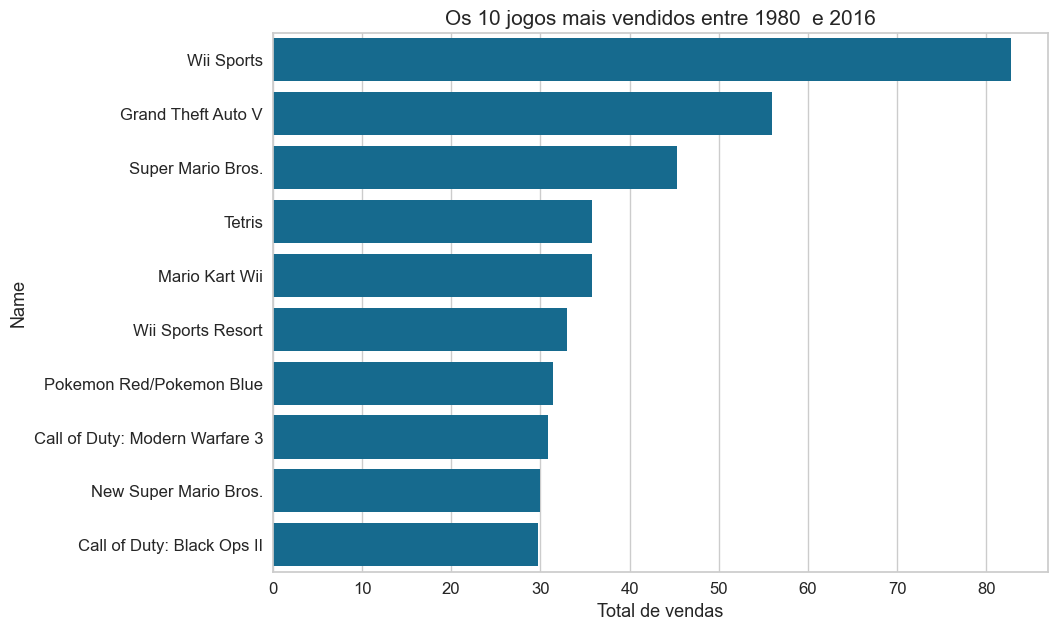

In [ ]:
# Plotando um gráfico de barras horizontal com os 10 jogos mais vendidos 
plt.figure(figsize = (10, 7))
sns.barplot(x = 'Global_Sales', y = top_10.index, data = top_10)
plt.ylabel('Name', size = 13)
plt.xlabel('Total de vendas', size = 13)
plt.title('Os 10 jogos mais vendidos entre 1980  e 2016', size = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()


Os jogos lançados para mais plataformas 

In [ ]:
multiplatform = pd.DataFrame(base.groupby('Name', as_index= False)['Platform'].count().sort_values('Platform', ascending= False).head(10))
multiplatform

,Name,Platform
6580,Need for Speed: Most Wanted,12
5031,LEGO Marvel Super Heroes,9
7633,Ratatouille,9
2872,FIFA 14,9
9787,The LEGO Movie Videogame,8
2873,FIFA 15,8
9566,Terraria,8
5096,Lego Batman 3: Beyond Gotham,8
5044,LEGO The Hobbit,8
5040,LEGO Star Wars II: The Original Trilogy,8


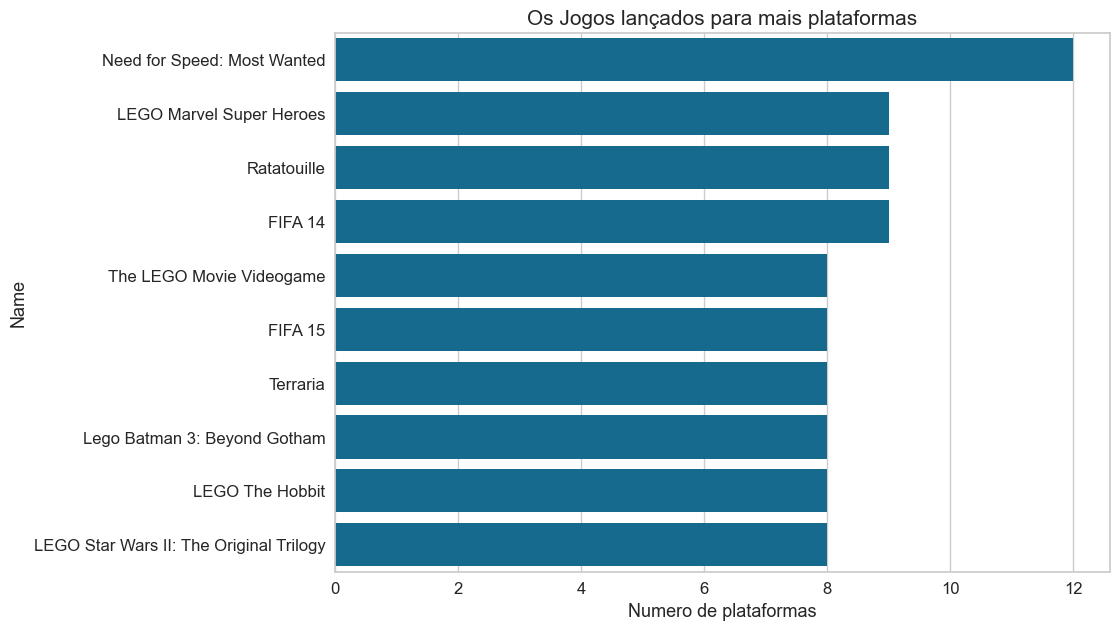

In [ ]:
plt.figure(figsize= (10, 7))
sns.barplot(x = 'Platform', y = 'Name', data = multiplatform)
plt.ylabel('Name', size = 13)
plt.xlabel('Numero de plataformas', size = 13)
plt.title('Os Jogos lançados para mais plataformas', size = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

Os consoles com mais lançamentos 

In [ ]:
# Criando dataframe mostrando os consoles que mais tiveram lançamento
most_releases = pd.DataFrame(base.Platform.value_counts().rename_axis('Platform').reset_index(name = 'Lançamentos').head(10))
most_releases

,Platform,Lançamentos
0,DS,2130
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234
5,PSP,1197
6,PS,1189
7,PC,938
8,XB,803
9,GBA,786


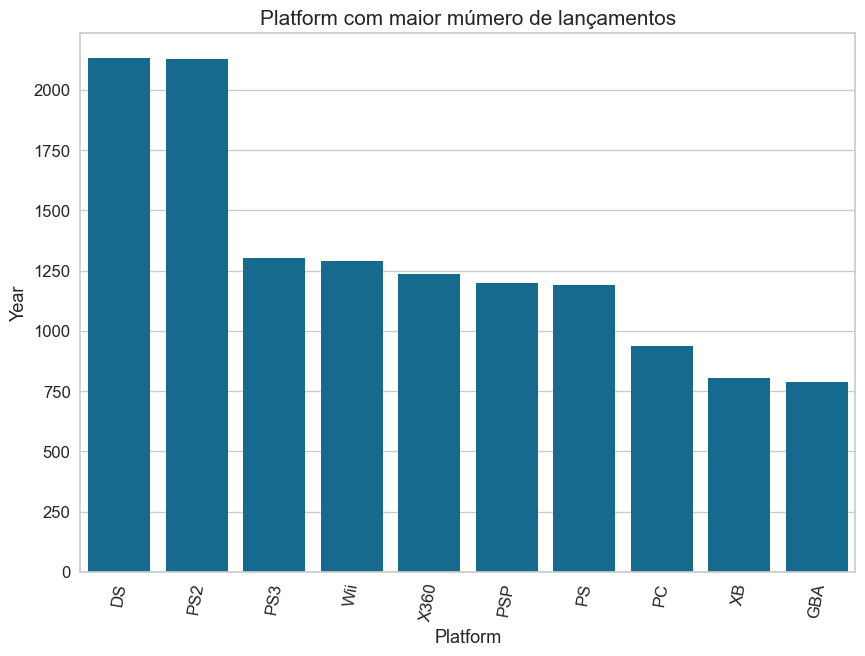

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x = 'Platform', y = 'Lançamentos' ,data = most_releases)
plt.ylabel('Year', size = 13)
plt.xlabel('Platform', size = 13)
plt.title('Platform com maior múmero de lançamentos', size = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 80)
plt.show()

Os Jogos mais vendidos do PlayStation 2 



In [ ]:
# Criando dataframe mostrando os consoles que mais venderam jogos
most_sales = pd.DataFrame(base.groupby('Platform')[['Global_Sales']].sum().sort_values('Global_Sales', 
                                                          ascending = False).head(10))
most_sales

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.62
PS,727.39
GBA,305.62
PSP,291.71
PS4,278.07


Frequência anual de lançamento

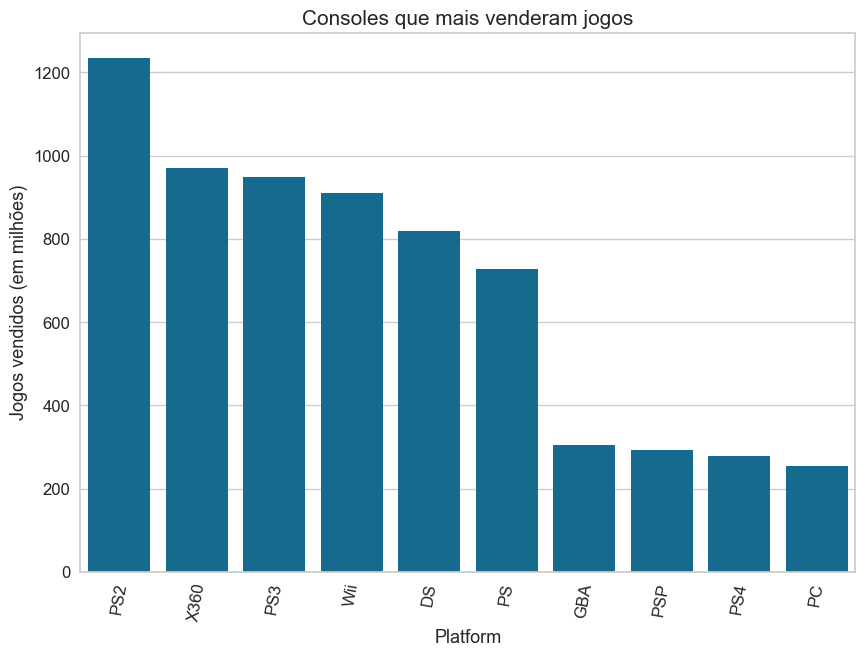

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = most_sales.index, y = 'Global_Sales', data = most_sales)
plt.ylabel('Jogos vendidos (em milhões)', size = 13)
plt.xlabel('Platform', size = 13)
plt.title('Consoles que mais venderam jogos', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

Publicadoras que mais venderam no PlayStation 2

In [ ]:
base['Year'].value_counts().head(10)

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Year, dtype: int64

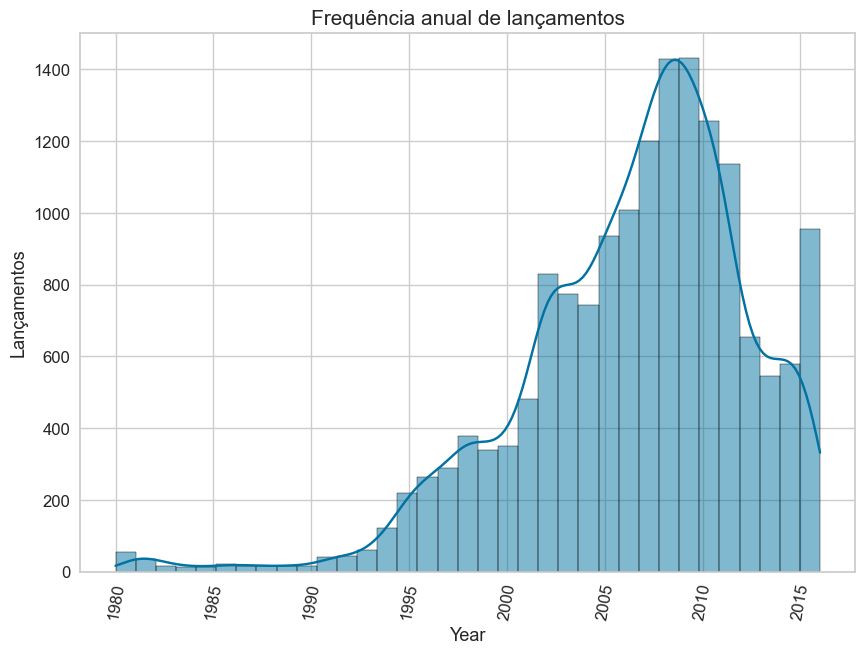

In [ ]:
# Visualizando histograma de lançamentos por ano
plt.figure(figsize=(10,7))
sns.histplot(data = base, x = "Year", bins=35, kde=True)
plt.ylabel('Lançamentos', size = 13)
plt.xlabel('Year', size = 13)
plt.title('Frequência anual de lançamentos', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

Número de vendas a cada ano

In [ ]:
base.groupby('Year')[['Global_Sales']].sum().sort_values('Global_Sales',
ascending= False).head(10)

,Global_Sales
Year,
2008,678.90
2009,667.30
2007,609.92
2010,600.29
2006,521.04
2011,515.80
2005,458.51
2004,414.01
2002,395.52


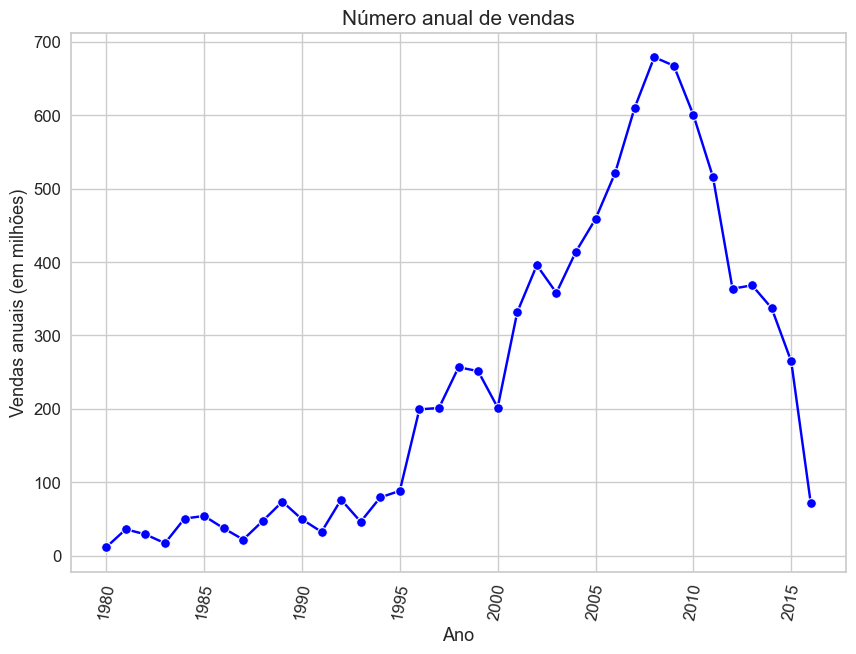

In [ ]:
#Visualizando as vendas anuais
plt.figure(figsize=(10,7))
sns.lineplot(data = base.groupby('Year')[['Global_Sales']].sum(),
            x = 'Year', y = 'Global_Sales', color = 'blue', marker = 'o')
plt.ylabel('Vendas anuais (em milhões)', size = 13)
plt.xlabel('Ano', size = 13)
plt.title('Número anual de vendas', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=80)
plt.show()

Gêneros mais vendidos

In [ ]:
genres = pd.DataFrame(base.groupby('Genre')['Global_Sales'].sum().sort_values(ascending= False))
genres

,Global_Sales
Genre,
Action,1722.83
Sports,1309.24
Shooter,1026.20
Role-Playing,923.79
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.69


In [ ]:
# Visualizando o funil de vendas por gênero
fig = px.funnel(genres, y = genres.index, x = 'Global_Sales')
fig.update_layout(
    title={
        'text': "Funil de vendas por gênero",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
# Criando um dataframe para visualizar o número de jogos lançados para cada console em cada gênero
genre_platform = pd.crosstab(base['Platform'], base['Genre'])
# Criando uma coluna que calcule o total de jogos port plataforma de acordo com o gênero
genre_platform['Total'] = genre_platform.sum(axis=1)
# Visualizando o dataframe
genre_platform.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0,116
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,180,36,14,53,28,19,10,85,6,28,25,15,499
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,335,238,36,389,89,236,66,196,42,279,146,78,2130


Publicadoras que mais lançaram jogos

In [ ]:
most_releases_by_publisher = base.Publisher.value_counts().rename_axis('Publisher').reset_index(
    name='Lançamentos').head(10)
most_releases_by_publisher


,Publisher,Lançamentos
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,917
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,630
9,Take-Two Interactive,412


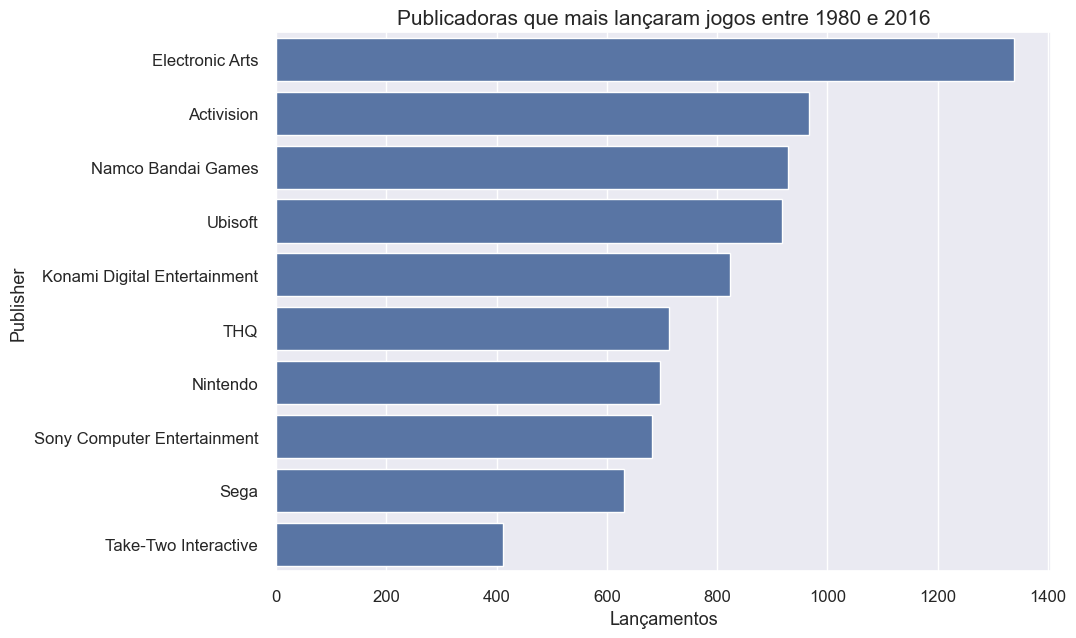

In [ ]:
# Visualizando o número de lançamentos por publicadora
plt.figure(figsize=(10,7))
sns.barplot(x ='Lançamentos', y ='Publisher', data = most_releases_by_publisher)
plt.ylabel('Publisher', size = 13)
plt.xlabel('Lançamentos', size = 13)
plt.title('Publicadoras que mais lançaram jogos entre 1980 e 2016', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Publicadoras que mais venderam jogos

In [ ]:
most_selling_publishers = pd.DataFrame(base.groupby('Publisher')
                                          ['Global_Sales'].sum().sort_values(ascending= False).head(10))
most_selling_publishers

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.25
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.66


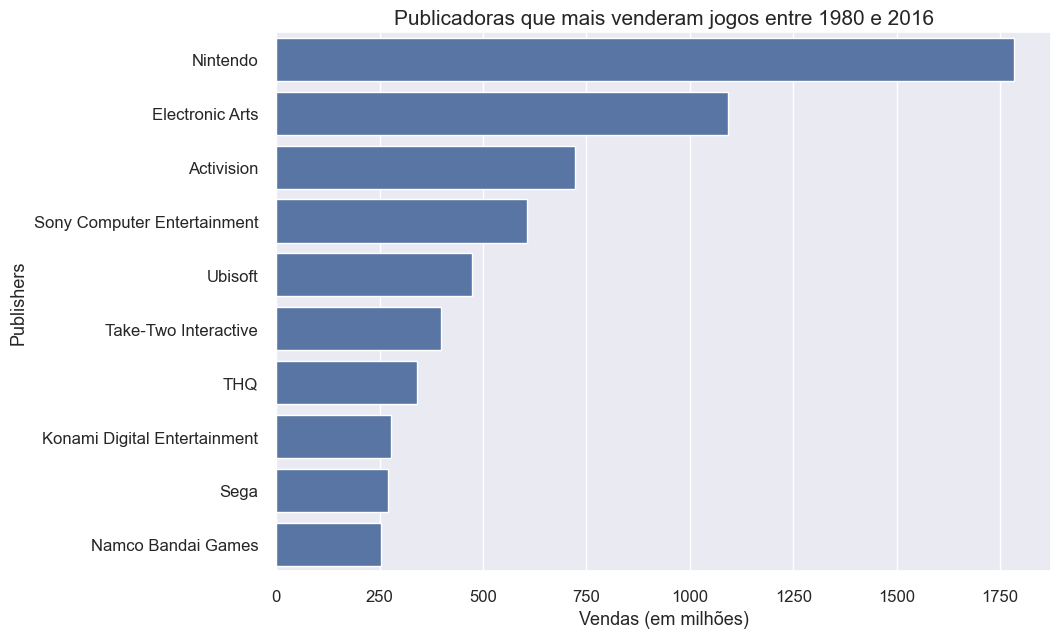

In [ ]:
# Visualizando as publicadores que mais venderam
plt.figure(figsize=(10,7))
sns.barplot(x ='Global_Sales', y =most_selling_publishers.index, data = most_selling_publishers)
plt.ylabel('Publishers', size = 13)
plt.xlabel('Vendas (em milhões)', size = 13)
plt.title('Publicadoras que mais venderam jogos entre 1980 e 2016', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Total de vendas anuais por região

In [ ]:
# Organizando o total  de vendas anuais por região
region_yearly_sales = pd.DataFrame(base.groupby('Year')[['NA_Sales', 
                                                        'EU_Sales',
                                                        'JP_Sales',
                                                        'Other_Sales']].sum())
region_yearly_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


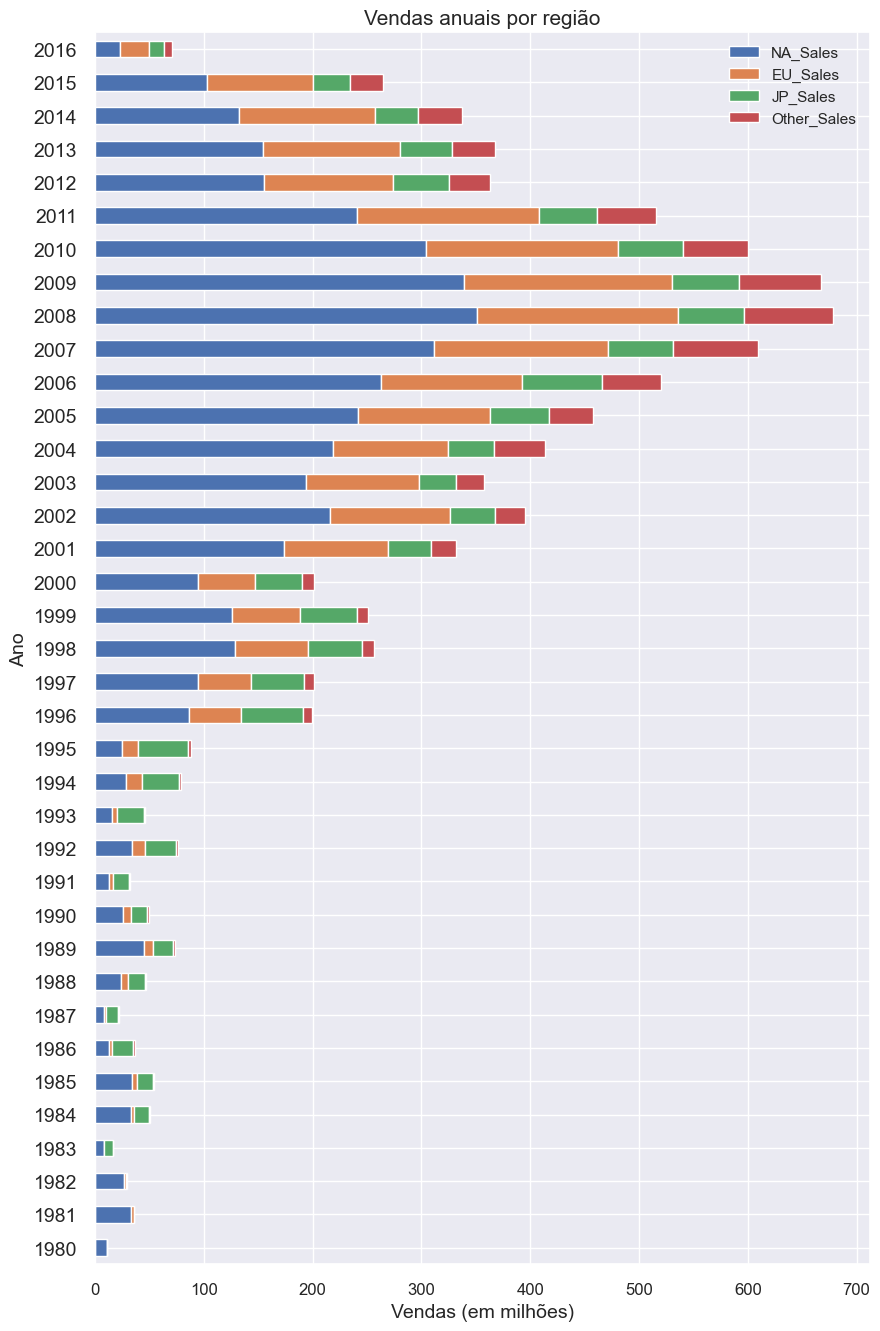

In [ ]:
# Visualizando o total de vendas anuais por região
region_yearly_sales.plot(kind = 'barh', stacked =True, legend = 10)
plt.gcf().set_size_inches(10,16)
plt.ylabel('Ano', size = 14)
plt.xlabel('Vendas (em milhões)', size = 14)
plt.title('Vendas anuais por região', size = 15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
# Criando dataframes que contabilizam os 5 consoles mais populares pelo número de vendas por região
platforms_na = base.groupby('Platform',as_index=True)[['NA_Sales']].sum().sort_values(
    'NA_Sales', ascending = False).head(5)
platforms_eu = base.groupby('Platform',as_index=True)[['EU_Sales']].sum().sort_values(
    'EU_Sales', ascending = False).head(5)
platforms_jp = base.groupby('Platform',as_index=True)[['JP_Sales']].sum().sort_values(
    'JP_Sales', ascending = False).head(5)
platforms_other = base.groupby('Platform',as_index=True)[['Other_Sales']].sum().sort_values(
    'Other_Sales', ascending = False).head(5)

Consoles mais populares na América do Norte

In [ ]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_na, names = platforms_na.index,
      values = 'NA_Sales', template = 'seaborn', title = 
             'Consoles mais populares na América do Norte')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 800x200 with 0 Axes>

Consoles mais populares na Europa

In [ ]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_eu, names = platforms_eu.index,
      values = 'EU_Sales', template = 'seaborn', title = 
             'Consoles mais populares na Europa')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 800x200 with 0 Axes>

Consoles mais populares no Japão

In [ ]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_jp, names = platforms_jp.index,
      values = 'JP_Sales', template = 'seaborn', title = 
             'Consoles mais populares no Japão')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 800x200 with 0 Axes>

Consoles mais populares em outras regiões

In [ ]:
plt.figure(figsize=(8,2))
fig = px.pie(platforms_other, names = platforms_other.index,
      values = 'Other_Sales', template = 'seaborn', title = 
             'Consoles mais populares em outras regiões')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

<Figure size 800x200 with 0 Axes>

Gêneros mais vendidos por região

In [ ]:
# Criando Dataframes que totalizam o total de vendas por gênero para cada região
genres_na = pd.DataFrame(base.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False))
genre_eu =pd.DataFrame(base.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False))
genre_jp =pd.DataFrame(base.groupby('Genre')['JP_Sales'].sum().sort_values(ascending = False))
genre_other =pd.DataFrame(base.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False))


Gêneros mais vendidos na América do Norte

In [ ]:
# Visualizando o funil de vendas na América do Norte por gênero
fig = px.funnel(genres_na, y = genres_na.index, x = 'NA_Sales')
fig.update_layout(
    title={
        'text': "Funil de vendas na América do Norte",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

Gêneros mais vendidos na Europa

In [ ]:
# Visualizando o funil de vendas na Europa por gênero
fig = px.funnel(genre_eu, y = genre_eu.index, x = 'EU_Sales')
fig.update_layout(
    title={
        'text': "Funil de vendas na Europa",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

Gêneros mais vendidos no Japão

In [ ]:
# Visualizando o funil de vendas no Japão por gênero
fig = px.funnel(genre_jp, y = genre_jp.index, x = 'JP_Sales')
fig.update_layout(
    title={
        'text': "Funil de vendas no Japão",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
# Visualizando o funil de vendas em outras regiões por gênero
fig = px.funnel(genre_other, y = genre_other.index, x = 'Other_Sales')
fig.update_layout(
    title={
        'text': "Funil de vendas  em outras regiões",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()